# Alpha Sweep Experiment

This notebook runs the RRT* planner for various values of `alpha` (1 to 5) to demonstrate how the incentive to collect plastic affects the path planning.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import planning_lib
from planning_lib import ContinuousPlannerUtil
from run_gpgp_experiment import rrt_star_tunable

## Run Experiments

In [6]:
c = ContinuousPlannerUtil('ocean_real.png', 'summer_2002_day0_density.png', scale=0.8)

alphas = []
lengths = []
plastics = []
ratios = []

for alpha in range(1, 20):
    print(f"\n--- Starting run for Alpha = {alpha}.0 ---")
    np.random.seed(42) # Result reproducibility for each run
    # Note: re-using the same planner util instance is fine as it just holds the map data
    L, P, ratio = rrt_star_tunable(c, alpha=float(alpha), loops=800)
    
    alphas.append(alpha)
    lengths.append(L)
    plastics.append(P)
    ratios.append(ratio)


--- Starting run for Alpha = 1.0 ---
Running RRT* with alpha=1.0...
[Alpha 1.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 1.15, Total Plastic: 0.08, Ratio (L/P): 14.26
rrt_tunable_alpha_1.0.gif has been created.

--- Starting run for Alpha = 2.0 ---
Running RRT* with alpha=2.0...
[Alpha 2.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 1.15, Total Plastic: 0.08, Ratio (L/P): 14.26
rrt_tunable_alpha_2.0.gif has been created.

--- Starting run for Alpha = 3.0 ---
Running RRT* with alpha=3.0...
[Alpha 3.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 1.19, Total Plastic: 0.10, Ratio (L/P): 11.97
rrt_tunable_alpha_3.0.gif has been created.

--- Starting run for Alpha = 4.0 ---
Running RRT* with alpha=4.0...
[Alpha 4.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 1.28, Total Plastic: 0.12, Ratio (L/P): 10.53
rrt_tunable_alpha_4.0.gif has been created.

--- Starting run for Alpha = 5.0 ---
Running RRT* with alpha=5.0...
[Al

## Plot Metrics

We investigate how increasing the `alpha` (plastics incentive) affects the path metrics.

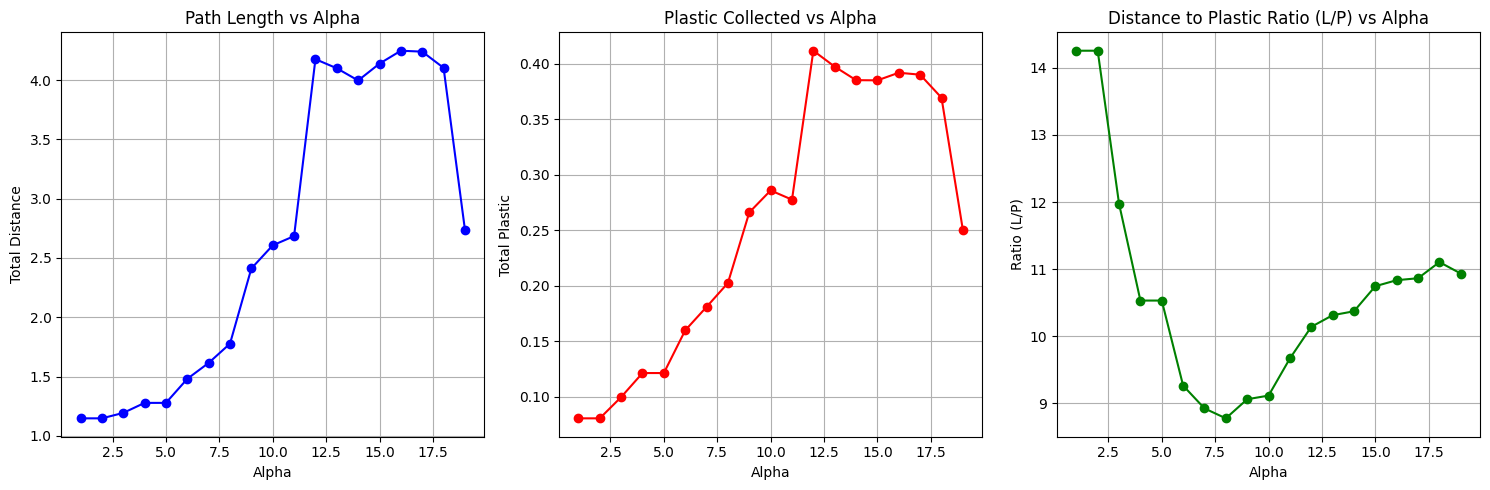

In [7]:
plt.figure(figsize=(15, 5))

# 1. Path Length vs Alpha
plt.subplot(1, 3, 1)
plt.plot(alphas, lengths, marker='o', color='blue')
plt.title('Path Length vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Total Distance')
plt.grid(True)

# 2. Plastic Collected vs Alpha
plt.subplot(1, 3, 2)
plt.plot(alphas, plastics, marker='o', color='red')
plt.title('Plastic Collected vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Total Plastic')
plt.grid(True)

# 3. Ratio (Length/Plastic) vs Alpha
plt.subplot(1, 3, 3)
plt.plot(alphas, ratios, marker='o', color='green')
plt.title('Distance to Plastic Ratio (L/P) vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Ratio (L/P)')
plt.grid(True)

plt.tight_layout()
plt.show()